In [17]:
import torch
from torch import nn, optim
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [18]:
model = nn.Linear(1, 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [19]:
def get_lr(optimizer):
    return optimizer.state_dict()['param_groups'][0]['lr']

# lr_scheduler

所有lr_scheduler都可以设置为上升和下降

## StepLR 按照固定阶段调整

In [20]:
epochs = 12
iters = 10

In [21]:
x = torch.arange(0, epochs, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [22]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [23]:
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
lr_scheduler

In [24]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05,
 1e-05]

In [25]:
assert len(lrs) == len(x)

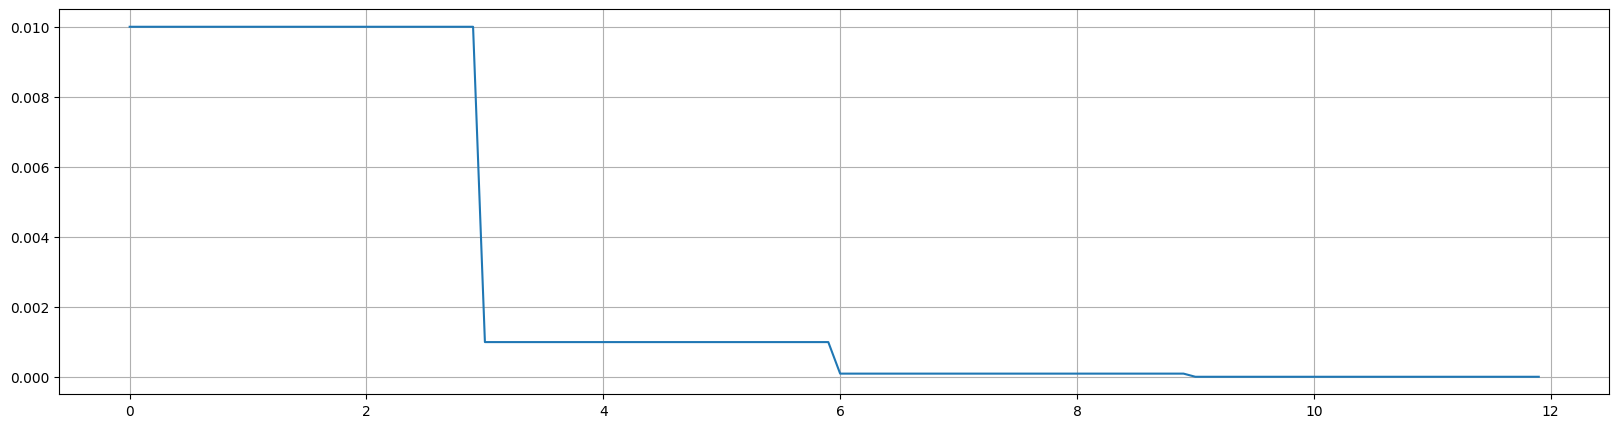

In [26]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [27]:
px.line(x=x, y=lrs)

## MultiStepLR 多阶段调整

In [28]:
epochs = 12
iters = 10

In [29]:
x = torch.arange(0, 12, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [30]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [31]:
lr_scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[8, 11], gamma=0.1)
lr_scheduler

In [32]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001]

In [33]:
assert len(lrs) == len(x)

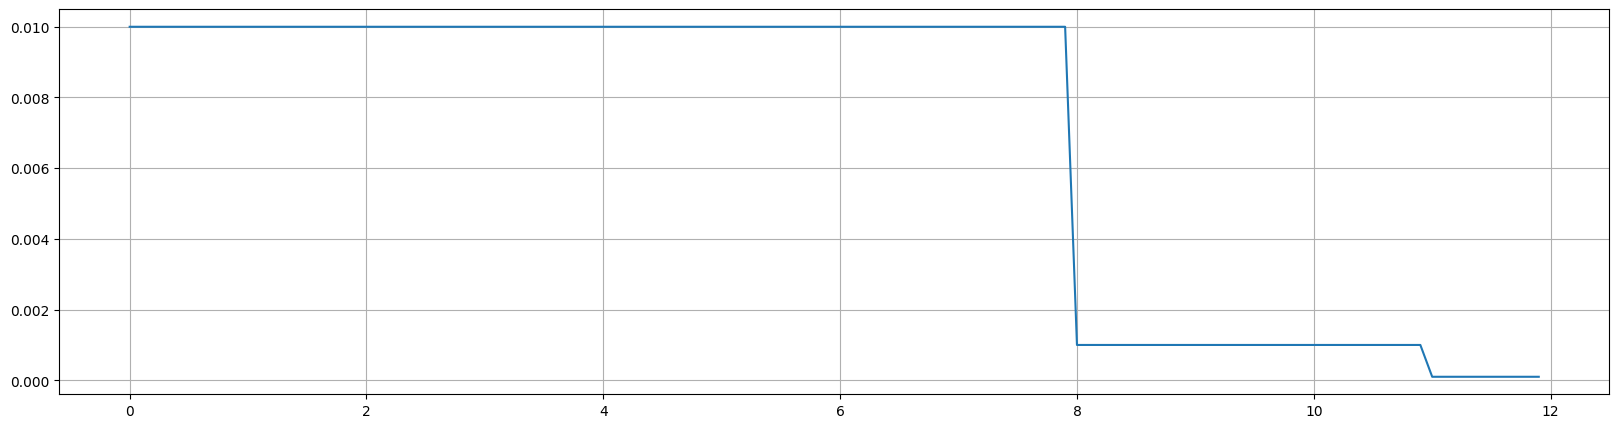

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [35]:
px.line(x=x, y=lrs)

## ExponentialLR 指数调整

In [36]:
epochs = 100
iters = 10

In [37]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [38]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [39]:
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
lr_scheduler

In [40]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.0059049

In [41]:
assert len(lrs) == len(x)

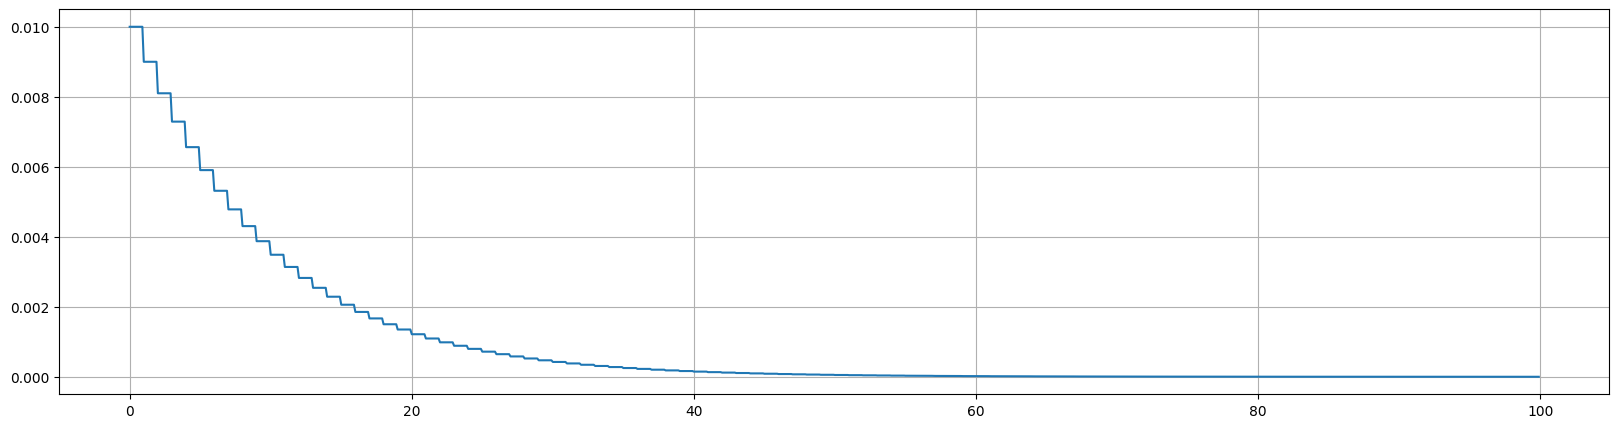

In [42]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [43]:
px.line(x=x, y=lrs)

## MultiplicativeLR 乘法调整

In [44]:
epochs = 100
iters = 10

In [45]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [46]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [47]:
# 将每个参数组的学习率乘以指定函数中给出的因子
lr_lambda = lambda x : 0.9
lr_scheduler = optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lr_lambda)
lr_scheduler

In [48]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.009000000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.008100000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.007290000000000001,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.006561000000000002,
 0.0059049

In [49]:
assert len(lrs) == len(x)

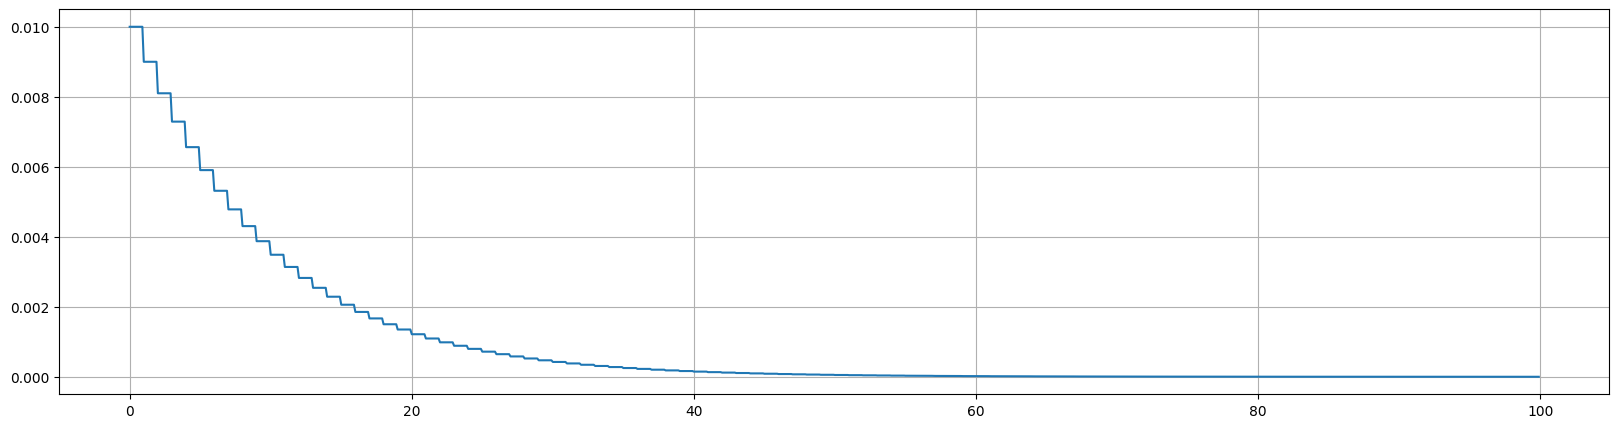

In [50]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [51]:
px.line(x=x, y=lrs)

## LinearLR 线性调整

### down

In [52]:
epochs = 100
iters = 10

In [53]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [54]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [55]:
lr_scheduler = optim.lr_scheduler.LinearLR(optimizer, start_factor=1, end_factor=0.01, total_iters=epochs)
lr_scheduler

In [56]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.009901,
 0.009901,
 0.009901,
 0.009901,
 0.009901,
 0.009901,
 0.009901,
 0.009901,
 0.009901,
 0.009901,
 0.009802,
 0.009802,
 0.009802,
 0.009802,
 0.009802,
 0.009802,
 0.009802,
 0.009802,
 0.009802,
 0.009802,
 0.009703,
 0.009703,
 0.009703,
 0.009703,
 0.009703,
 0.009703,
 0.009703,
 0.009703,
 0.009703,
 0.009703,
 0.009604,
 0.009604,
 0.009604,
 0.009604,
 0.009604,
 0.009604,
 0.009604,
 0.009604,
 0.009604,
 0.009604,
 0.009505,
 0.009505,
 0.009505,
 0.009505,
 0.009505,
 0.009505,
 0.009505,
 0.009505,
 0.009505,
 0.009505,
 0.009406,
 0.009406,
 0.009406,
 0.009406,
 0.009406,
 0.009406,
 0.009406,
 0.009406,
 0.009406,
 0.009406,
 0.009307,
 0.009307,
 0.009307,
 0.009307,
 0.009307,
 0.009307,
 0.009307,
 0.009307,
 0.009307,
 0.009307,
 0.009208,
 0.009208,
 0.009208,
 0.009208,
 0.009208,
 0.009208,
 0.009208,
 0.009208,
 0.009208,
 0.009208,
 0.009108999999999999,
 0.009108999999999999,
 0.0

In [57]:
assert len(lrs) == len(x)

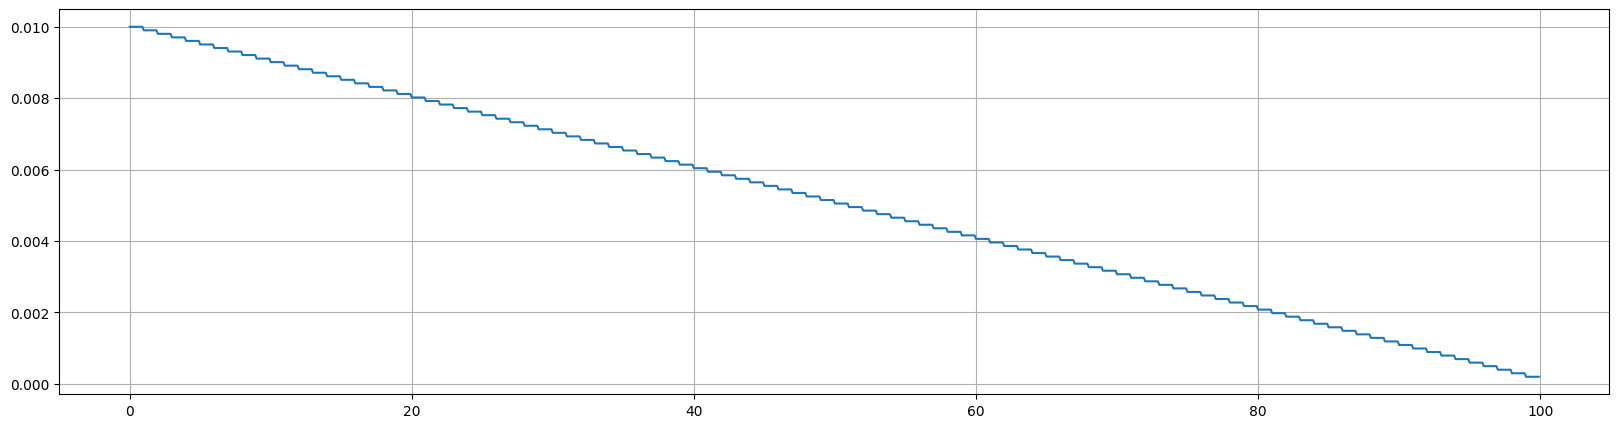

In [58]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [59]:
px.line(x=x, y=lrs)

### up(warmup)

In [60]:
epochs = 100
iters = 10

In [61]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [62]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [63]:
lr_scheduler = optim.lr_scheduler.LinearLR(optimizer, start_factor=0.01, end_factor=1, total_iters=epochs)
lr_scheduler

In [64]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.000199,
 0.000199,
 0.000199,
 0.000199,
 0.000199,
 0.000199,
 0.000199,
 0.000199,
 0.000199,
 0.000199,
 0.00029800000000000003,
 0.00029800000000000003,
 0.00029800000000000003,
 0.00029800000000000003,
 0.00029800000000000003,
 0.00029800000000000003,
 0.00029800000000000003,
 0.00029800000000000003,
 0.00029800000000000003,
 0.00029800000000000003,
 0.0003970000000000001,
 0.0003970000000000001,
 0.0003970000000000001,
 0.0003970000000000001,
 0.0003970000000000001,
 0.0003970000000000001,
 0.0003970000000000001,
 0.0003970000000000001,
 0.0003970000000000001,
 0.0003970000000000001,
 0.0004960000000000001,
 0.0004960000000000001,
 0.0004960000000000001,
 0.0004960000000000001,
 0.0004960000000000001,
 0.0004960000000000001,
 0.0004960000000000001,
 0.0004960000000000001,
 0.0004960000000000001,
 0.0004960000000000001,
 0.0005950000000000003,
 0.0005950000000000003,
 0.0005950000000000003

In [65]:
assert len(lrs) == len(x)

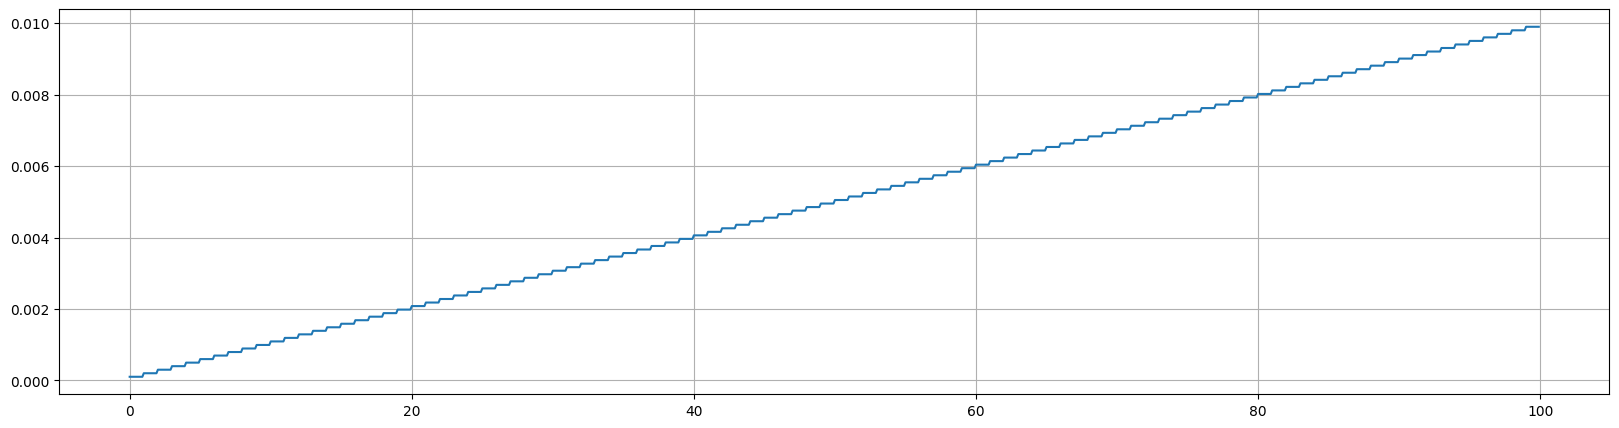

In [66]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [67]:
px.line(x=x, y=lrs)

## PolynomialLR

### power=1

In [68]:
epochs = 100
iters = 10

In [69]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [70]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [71]:
lr_scheduler = optim.lr_scheduler.PolynomialLR(optimizer, total_iters=epochs, power=1)
lr_scheduler

In [72]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.009800000000000001,
 0.009800000000000001,
 0.009800000000000001,
 0.009800000000000001,
 0.009800000000000001,
 0.009800000000000001,
 0.009800000000000001,
 0.009800000000000001,
 0.009800000000000001,
 0.009800000000000001,
 0.009700000000000002,
 0.009700000000000002,
 0.009700000000000002,
 0.009700000000000002,
 0.009700000000000002,
 0.009700000000000002,
 0.009700000000000002,
 0.009700000000000002,
 0.009700000000000002,
 0.009700000000000002,
 0.009600000000000003,
 0.009600000000000003,
 0.009600000000000003,
 0.009600000000000003,
 0.009600000000000003,
 0.009600000000000003,
 0.009600000000000003,
 0.009600000000000003,
 0.009600000000000003,
 0.009600000000000003,
 0.009500000000000003,
 0.009500000000000003,
 0.009500000000000003,
 0.009500000000000003,
 0.009500000000000003,
 0.009500000000000003,
 0.009500000

In [73]:
assert len(lrs) == len(x)

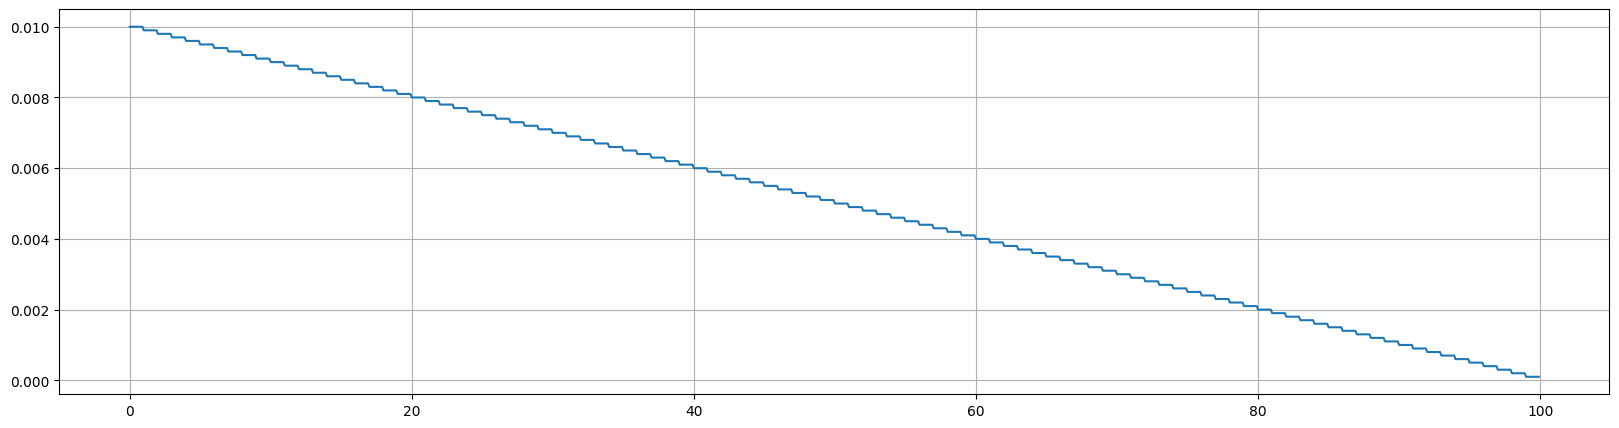

In [74]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [75]:
px.line(x=x, y=lrs)

### power=2

In [76]:
epochs = 100
iters = 10

In [77]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [78]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [79]:
lr_scheduler = optim.lr_scheduler.PolynomialLR(optimizer, total_iters=epochs, power=2)
lr_scheduler

In [80]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.009801,
 0.009801,
 0.009801,
 0.009801,
 0.009801,
 0.009801,
 0.009801,
 0.009801,
 0.009801,
 0.009801,
 0.009604000000000001,
 0.009604000000000001,
 0.009604000000000001,
 0.009604000000000001,
 0.009604000000000001,
 0.009604000000000001,
 0.009604000000000001,
 0.009604000000000001,
 0.009604000000000001,
 0.009604000000000001,
 0.009409,
 0.009409,
 0.009409,
 0.009409,
 0.009409,
 0.009409,
 0.009409,
 0.009409,
 0.009409,
 0.009409,
 0.009216,
 0.009216,
 0.009216,
 0.009216,
 0.009216,
 0.009216,
 0.009216,
 0.009216,
 0.009216,
 0.009216,
 0.009025,
 0.009025,
 0.009025,
 0.009025,
 0.009025,
 0.009025,
 0.009025,
 0.009025,
 0.009025,
 0.009025,
 0.008836,
 0.008836,
 0.008836,
 0.008836,
 0.008836,
 0.008836,
 0.008836,
 0.008836,
 0.008836,
 0.008836,
 0.008649,
 0.008649,
 0.008649,
 0.008649,
 0.008649,
 0.008649,
 0.008649,
 0.008649,
 0.008649,
 0.008649,
 0.008464000000000003,
 0.00846400000000

In [81]:
assert len(lrs) == len(x)

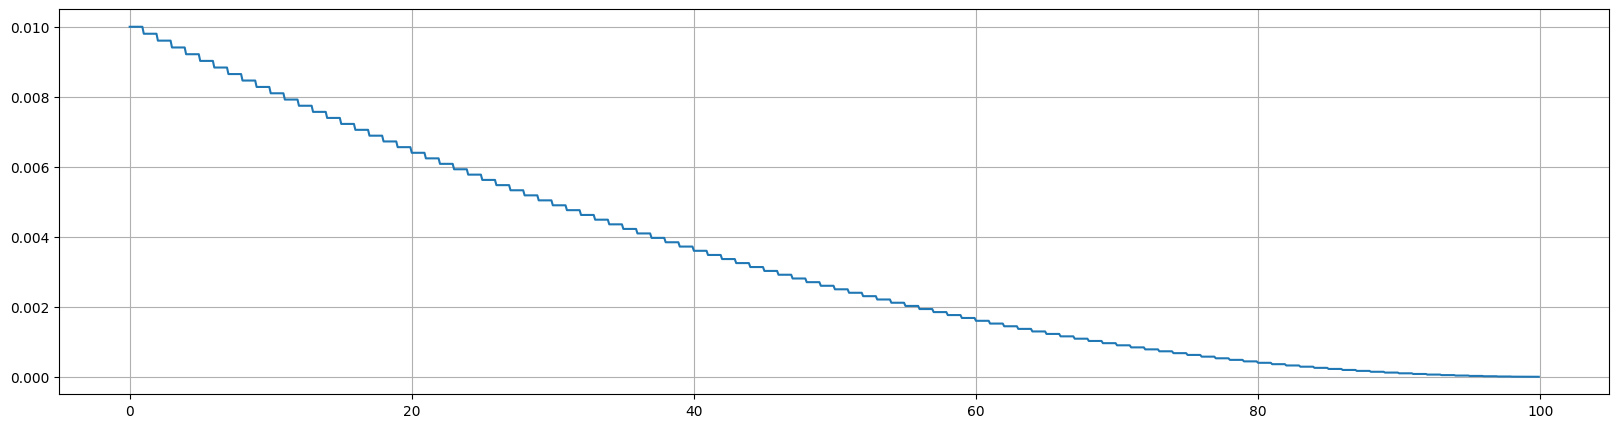

In [82]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [83]:
px.line(x=x, y=lrs)

## CosineAnnealingLR 余弦调整

In [84]:
epochs = 100
iters = 10

In [85]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [86]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [87]:
lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0.01 * 0.01)
lr_scheduler

In [88]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009990232305719946,
 0.009990232305719946,
 0.009990232305719946,
 0.009990232305719946,
 0.009990232305719946,
 0.009990232305719946,
 0.009990232305719946,
 0.009990232305719946,
 0.009990232305719946,
 0.009990232305719946,
 0.009978031724785247,
 0.009978031724785247,
 0.009978031724785247,
 0.009978031724785247,
 0.009978031724785247,
 0.009978031724785247,
 0.009978031724785247,
 0.009978031724785247,
 0.009978031724785247,
 0.009978031724785247,
 0.009960967771506667,
 0.009960967771506667,
 0.009960967771506667,
 0.009960967771506667,
 0.009960967771506667,
 0.009960967771506667,
 0.009960967771506667,
 0.009960967771506667,
 0.009960967771506667,
 0.009960967771506667,
 0.0099390

In [89]:
assert len(lrs) == len(x)

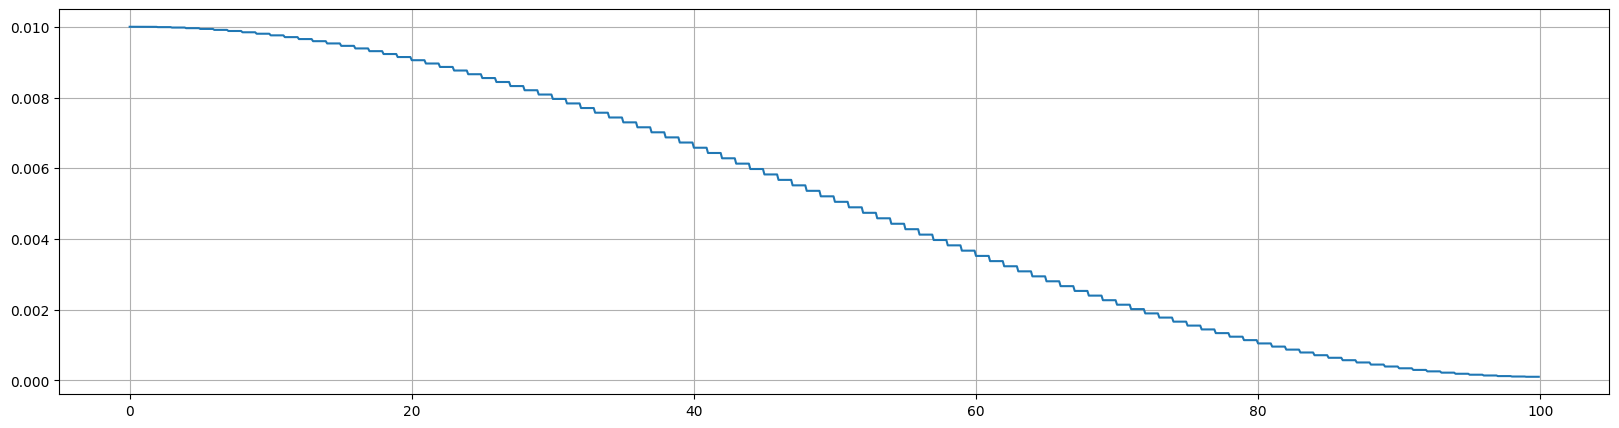

In [90]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [91]:
px.line(x=x, y=lrs)

## CosineAnnealingWarmRestarts 余弦重启调整

In [92]:
epochs = 100
iters = 10

In [93]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [94]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [95]:
# T_0=10    10个周期重启一次
# T_mult=2  周期重启倍率,最终周期为 10 20 40 80
lr_scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.01 * 0.01)
lr_scheduler

In [96]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.009757729755661011,
 0.009757729755661011,
 0.009757729755661011,
 0.009757729755661011,
 0.009757729755661011,
 0.009757729755661011,
 0.009757729755661011,
 0.009757729755661011,
 0.009757729755661011,
 0.009757729755661011,
 0.00905463412215599,
 0.00905463412215599,
 0.00905463412215599,
 0.00905463412215599,
 0.00905463412215599,
 0.00905463412215599,
 0.00905463412215599,
 0.00905463412215599,
 0.00905463412215599,
 0.00905463412215599,
 0.007959536998847742,
 0.007959536998847742,
 0.007959536998847742,
 0.007959536998847742,
 0.007959536998847742,
 0.007959536998847742,
 0.007959536998847742,
 0.007959536998847742,
 0.007959536998847742,
 0.007959536998847742,
 0.006579634122155991,
 0.006579634122155991,
 0.006579634122155991,
 0.006579634122155991,
 0.006579634122155991,
 0.006579634122155991,
 0.006579634122155991,
 0.006579634122155991,
 0.006579634122155991,
 0.006579634122155991,
 0.00505000000000000

In [97]:
assert len(lrs) == len(x)

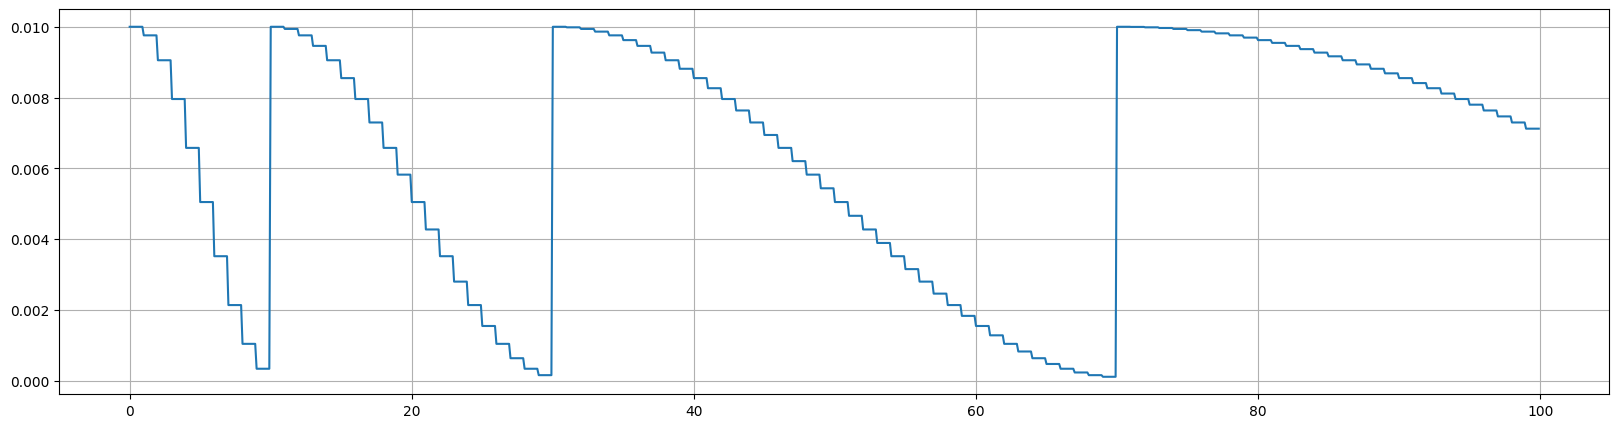

In [98]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [99]:
px.line(x=x, y=lrs)

## CyclicLR

### mode = "triangular"

In [100]:
epochs = 100
iters = 10

In [101]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [102]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [103]:
# base_lr: 最小学习率
# max_lr: 最大学习率
# step_size_up: 上升/下降周期
# mode: [triangular, triangular2, exp_range]
lr_scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.01 * 0.01, max_lr=0.01, step_size_up=5, mode="triangular")
lr_scheduler

In [104]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.

In [105]:
assert len(lrs) == len(x)

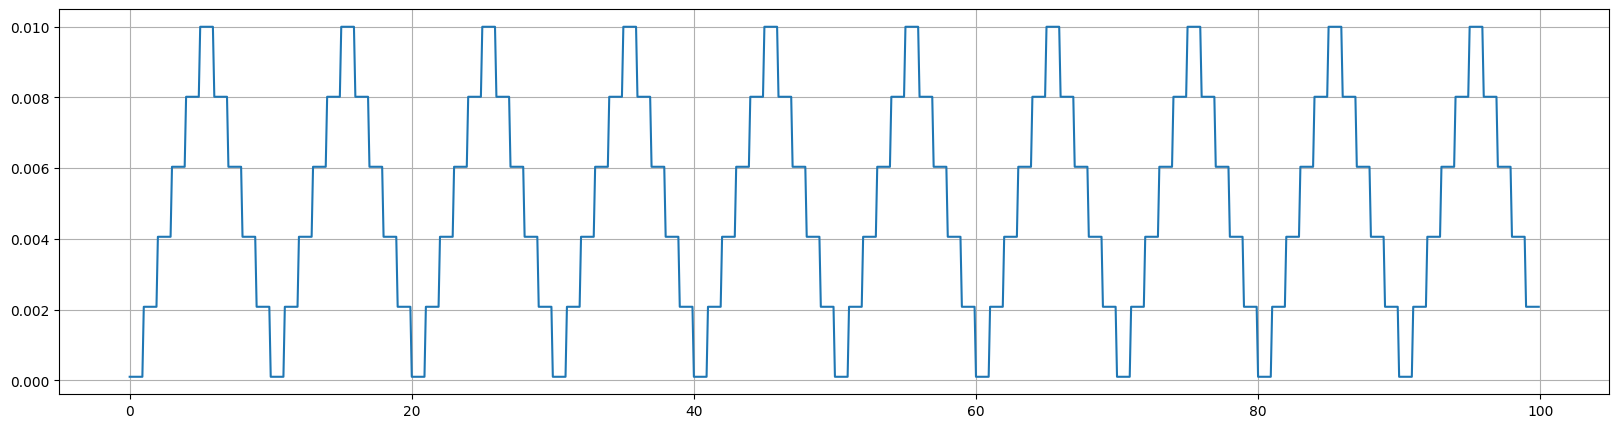

In [106]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [107]:
px.line(x=x, y=lrs)

### mode = "triangular2"

In [108]:
epochs = 100
iters = 10

In [109]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [110]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [111]:
# base_lr: 最小学习率
# max_lr: 最大学习率
# step_size_up: 上升/下降周期
# mode: [triangular, triangular2, exp_range]
lr_scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.01 * 0.01, max_lr=0.01, step_size_up=5, mode="triangular2")
lr_scheduler

In [112]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.0020800000000000016,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.004059999999999999,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.006040000000000002,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.008019999999999998,
 0.

In [113]:
assert len(lrs) == len(x)

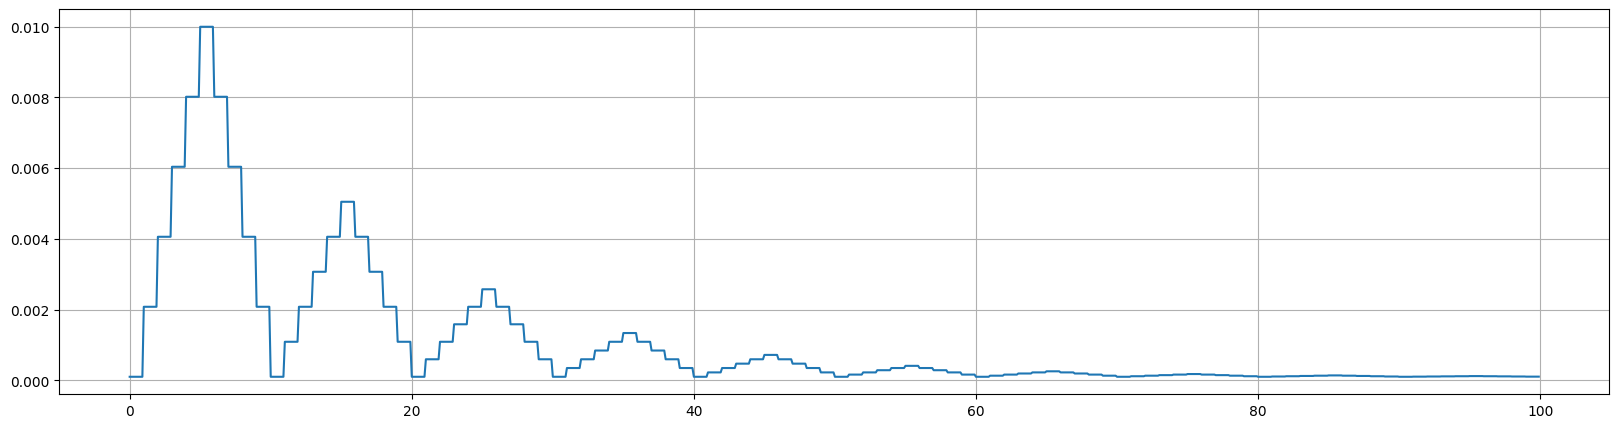

In [114]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [115]:
px.line(x=x, y=lrs)

### mode = "exp_range" 略微向左偏移的三角形

In [116]:
epochs = 100
iters = 10

In [117]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [118]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [119]:
# base_lr: 最小学习率
# max_lr: 最大学习率
# step_size_up: 上升/下降周期
# mode: [triangular, triangular2, exp_range]
lr_scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.01 * 0.01, max_lr=0.01, step_size_up=5 * iters, mode="exp_range")
lr_scheduler

In [120]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
        # by iter, 为了更容易看出来效果
        lr_scheduler.step()
lrs

[0.0001,
 0.0002980000000000002,
 0.0004960000000000005,
 0.0006940000000000006,
 0.0008920000000000009,
 0.001090000000000001,
 0.0012880000000000012,
 0.0014860000000000014,
 0.0016840000000000017,
 0.0018820000000000017,
 0.0020800000000000016,
 0.002278000000000002,
 0.002476000000000002,
 0.002673999999999998,
 0.0028720000000000026,
 0.0030699999999999985,
 0.0032679999999999983,
 0.0034659999999999986,
 0.003663999999999999,
 0.003861999999999999,
 0.004059999999999999,
 0.004258,
 0.004456,
 0.004654,
 0.004852,
 0.005050000000000001,
 0.005248000000000001,
 0.005446000000000001,
 0.0056440000000000014,
 0.005842000000000002,
 0.006040000000000002,
 0.006238000000000002,
 0.006436000000000002,
 0.006634000000000002,
 0.006832000000000002,
 0.007030000000000002,
 0.007227999999999998,
 0.007426000000000003,
 0.007623999999999999,
 0.007822000000000003,
 0.008019999999999998,
 0.008217999999999998,
 0.008415999999999998,
 0.008613999999999998,
 0.008811999999999999,
 0.0090099999

In [121]:
assert len(lrs) == len(x)

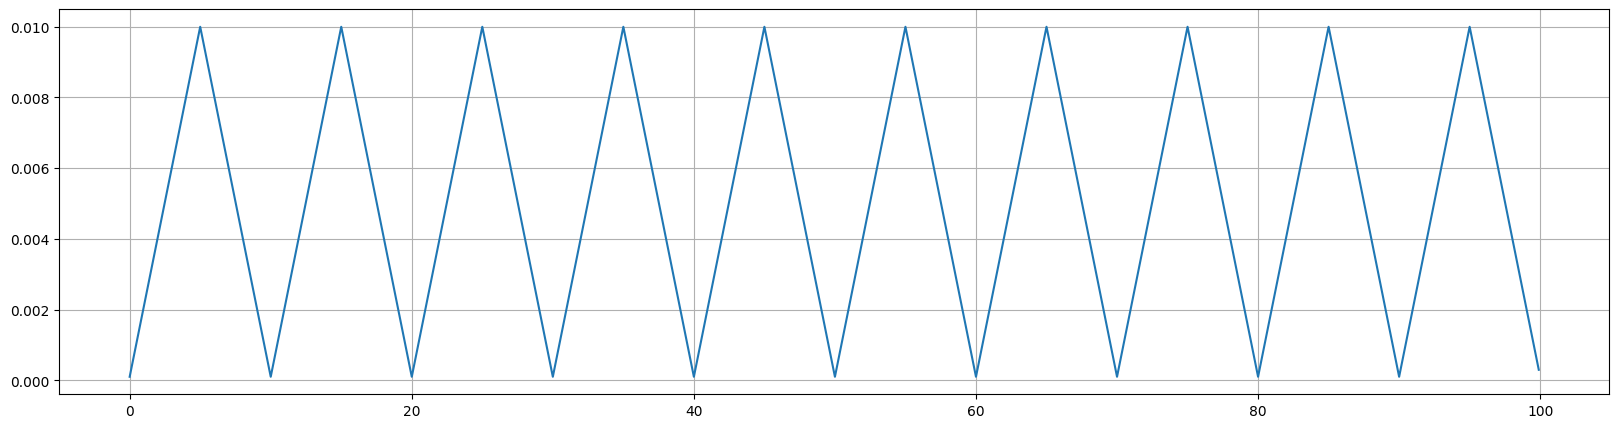

In [122]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [123]:
px.line(x=x, y=lrs)

## LambdaLR 自定义函数

In [124]:
epochs = 100
iters = 10

In [125]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [126]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [127]:
# 自定义cos衰减
import math
lf = lambda x: ((1 + math.cos(x * math.pi / epochs)) / 2) * (1 - 0.01) + 0.01  # cosine
lr_scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lf)

In [128]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009997557473810372,
 0.009990232305719944,
 0.009990232305719944,
 0.009990232305719944,
 0.009990232305719944,
 0.009990232305719944,
 0.009990232305719944,
 0.009990232305719944,
 0.009990232305719944,
 0.009990232305719944,
 0.009990232305719944,
 0.009978031724785246,
 0.009978031724785246,
 0.009978031724785246,
 0.009978031724785246,
 0.009978031724785246,
 0.009978031724785246,
 0.009978031724785246,
 0.009978031724785246,
 0.009978031724785246,
 0.009978031724785246,
 0.009960967771506665,
 0.009960967771506665,
 0.009960967771506665,
 0.009960967771506665,
 0.009960967771506665,
 0.009960967771506665,
 0.009960967771506665,
 0.009960967771506665,
 0.009960967771506665,
 0.009960967771506665,
 0.0099390

In [129]:
assert len(lrs) == len(x)

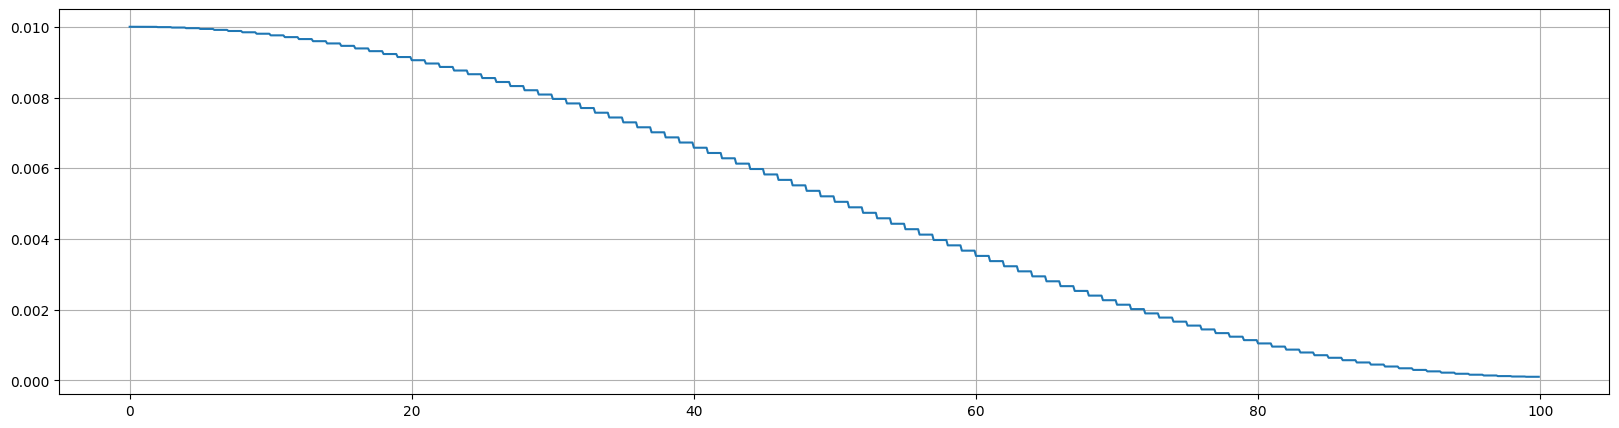

In [130]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [131]:
px.line(x=x, y=lrs)

## ConstantLR 固定值

In [132]:
epochs = 100
iters = 10

In [133]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [134]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [135]:
# 前50轮降低为0.5
lr_scheduler = optim.lr_scheduler.ConstantLR(optimizer, factor=0.5, total_iters=50)
lr_scheduler

In [136]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,


In [137]:
assert len(lrs) == len(x)

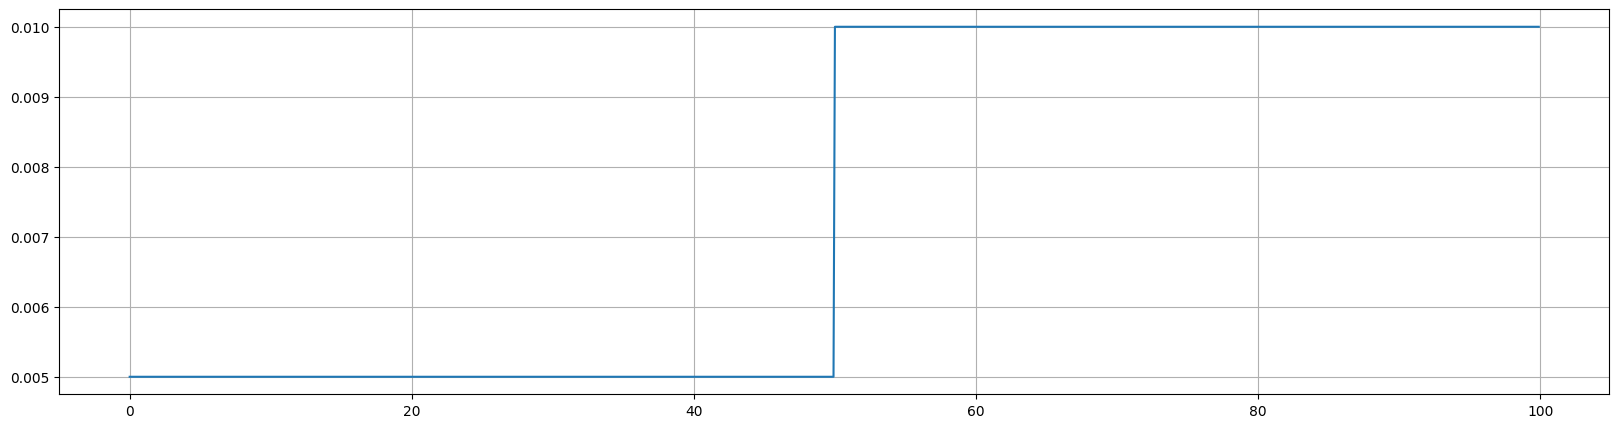

In [138]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [139]:
px.line(x=x, y=lrs)

## OneCycleLR

### anneal_strategy="cos"

In [140]:
epochs = 100
iters = 10

In [141]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [142]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [143]:
# max_lr: 最大学习率
# total_steps: 总step数,如果不设置,则必须设置steps_per_epoch,epochs
# steps_per_epoch: 每个epoch的iter数
# epochs: 总epoch
# anneal_strategy: [cos, linear]
lr_scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=10, epochs=100, anneal_strategy="cos")
lr_scheduler

In [144]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
        lr_scheduler.step()
lrs

[0.0003999999999999993,
 0.000400264950421678,
 0.0004010597724372431,
 0.0004023843783015138,
 0.00040423862178329446,
 0.0004066222981815009,
 0.0004095351443477741,
 0.0004129768387155213,
 0.00041694700133542047,
 0.00042144519391736253,
 0.00042647091987883974,
 0.0004320236243997612,
 0.0004381026944837111,
 0.0004447074590256117,
 0.0004518371888858185,
 0.000459491096970608,
 0.0004676683383190751,
 0.00047636801019640754,
 0.0004855891521935562,
 0.0004953307463332387,
 0.0005055917171823444,
 0.0005163709319706434,
 0.0005276672007158388,
 0.00053947927635495,
 0.0005518058548819628,
 0.0005646455754918043,
 0.0005779970207305616,
 0.0005918587166519693,
 0.0006062291329801128,
 0.0006211066832783867,
 0.0006364897251246119,
 0.0006523765602923625,
 0.0006687654349384394,
 0.0006856545397964878,
 0.0007030420103767369,
 0.0007209259271718279,
 0.000739304315868718,
 0.0007581751475666445,
 0.000777536339001102,
 0.0007973857527738253,
 0.0008177211975887496,
 0.00083854042849

In [145]:
assert len(lrs) == len(x)

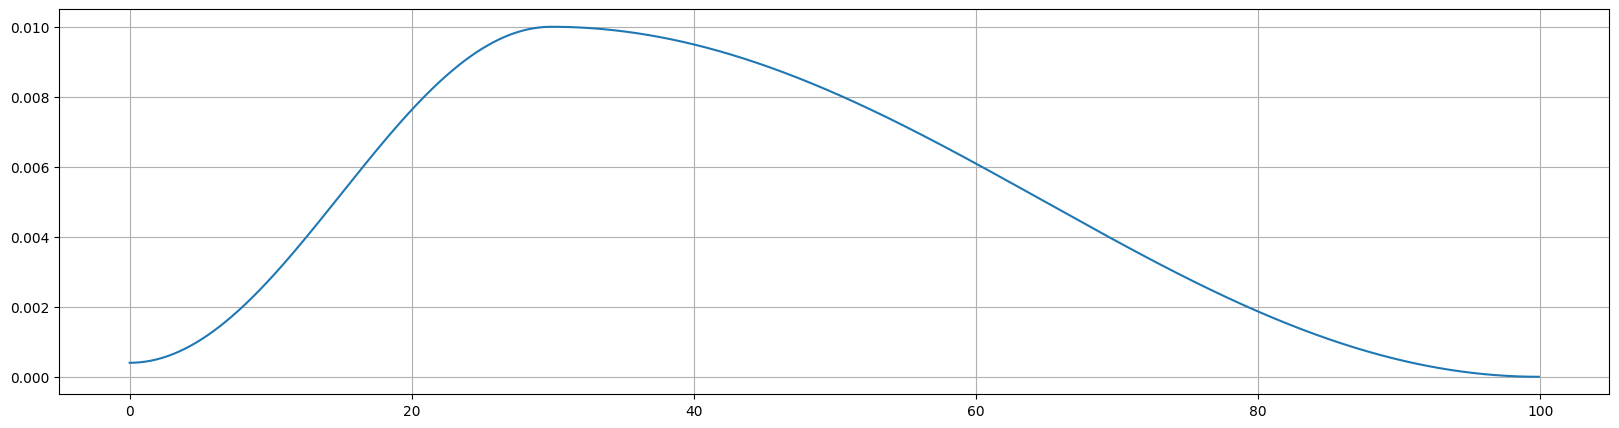

In [146]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [147]:
px.line(x=x, y=lrs)

### anneal_strategy="linear"

In [148]:
epochs = 100
iters = 10

In [149]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [150]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [151]:
# max_lr: 最大学习率
# total_steps: 总step数,如果不设置,则必须设置steps_per_epoch,epochs
# steps_per_epoch: 每个epoch的iter数
# epochs: 总epoch
# anneal_strategy: [cos, linear]
lr_scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=10, epochs=100, anneal_strategy="linear")
lr_scheduler

In [152]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
        lr_scheduler.step()
lrs

[0.0004,
 0.00043210702341137125,
 0.0004642140468227425,
 0.0004963210702341138,
 0.000528428093645485,
 0.0005605351170568562,
 0.0005926421404682274,
 0.0006247491638795987,
 0.00065685618729097,
 0.0006889632107023411,
 0.0007210702341137124,
 0.0007531772575250837,
 0.0007852842809364549,
 0.0008173913043478261,
 0.0008494983277591974,
 0.0008816053511705687,
 0.0009137123745819398,
 0.0009458193979933111,
 0.0009779264214046823,
 0.0010100334448160536,
 0.0010421404682274247,
 0.001074247491638796,
 0.0011063545150501674,
 0.0011384615384615385,
 0.0011705685618729098,
 0.001202675585284281,
 0.0012347826086956523,
 0.0012668896321070234,
 0.0012989966555183947,
 0.001331103678929766,
 0.0013632107023411372,
 0.0013953177257525085,
 0.0014274247491638796,
 0.0014595317725752508,
 0.001491638795986622,
 0.0015237458193979934,
 0.0015558528428093645,
 0.0015879598662207359,
 0.001620066889632107,
 0.0016521739130434783,
 0.0016842809364548495,
 0.0017163879598662208,
 0.00174849498

In [153]:
assert len(lrs) == len(x)

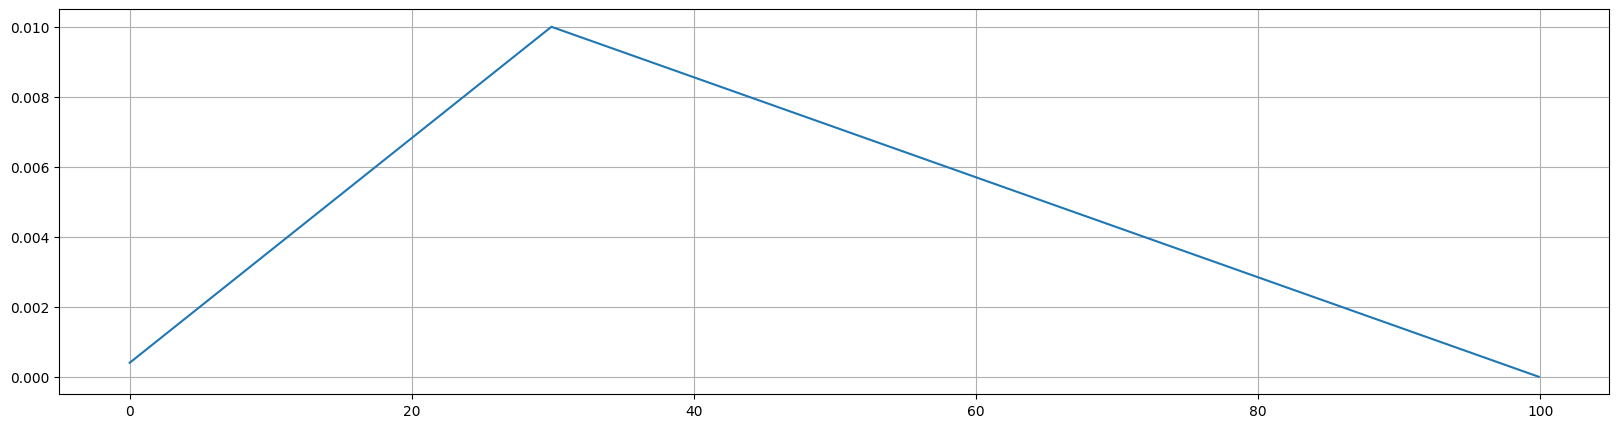

In [154]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [155]:
px.line(x=x, y=lrs)

## ChainedScheduler

### LinearLR + CosineAnnealingLR (by epoch)

In [156]:
epochs = 100
iters = 10

In [157]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [158]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [159]:
warmup_epochs = 5
lr_scheduler1 = optim.lr_scheduler.LinearLR(optimizer, start_factor=0.01, end_factor=1, total_iters=warmup_epochs)
lr_scheduler1

In [160]:
lr_scheduler2 = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs - warmup_epochs, eta_min=0.01 * 0.01)
lr_scheduler2

In [161]:
lr_scheduler = optim.lr_scheduler.ChainedScheduler([lr_scheduler1, lr_scheduler2])
lr_scheduler

In [162]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
    lr_scheduler.step()
lrs

[0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0020794587247675166,
 0.0020794587247675166,
 0.0020794587247675166,
 0.0020794587247675166,
 0.0020794587247675166,
 0.0020794587247675166,
 0.0020794587247675166,
 0.0020794587247675166,
 0.0020794587247675166,
 0.0020794587247675166,
 0.004055696983401133,
 0.004055696983401133,
 0.004055696983401133,
 0.004055696983401133,
 0.004055696983401133,
 0.004055696983401133,
 0.004055696983401133,
 0.004055696983401133,
 0.004055696983401133,
 0.004055696983401133,
 0.006025488089891805,
 0.006025488089891805,
 0.006025488089891805,
 0.006025488089891805,
 0.006025488089891805,
 0.006025488089891805,
 0.006025488089891805,
 0.006025488089891805,
 0.006025488089891805,
 0.006025488089891805,
 0.007985607907019686,
 0.007985607907019686,
 0.007985607907019686,
 0.007985607907019686,
 0.007985607907019686,
 0.007985607907019686,
 0.007985607907019686,
 0.007985607907019686,
 0.007985607907019686,
 0.

In [163]:
assert len(lrs) == len(x)

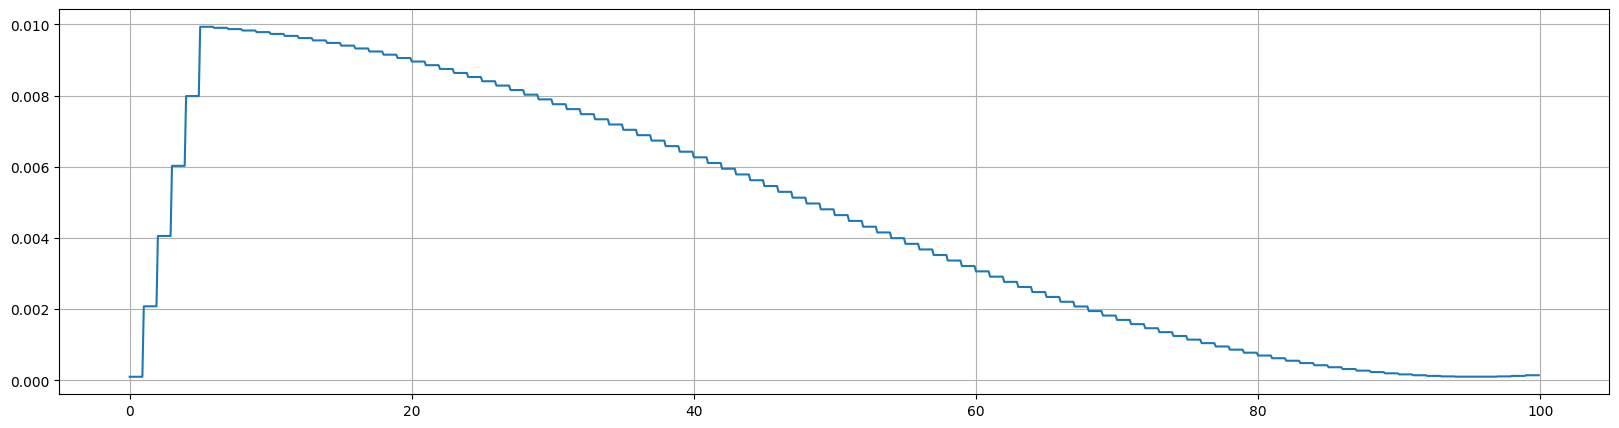

In [164]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [165]:
px.line(x=x, y=lrs)

### LinearLR + CosineAnnealingLR (by iter)

In [166]:
epochs = 100
iters = 10

In [167]:
x = torch.arange(0, 100, 0.1)
x

tensor([ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,
         5.6000,  5.7000,  5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,
         6.4000,  6.5000,  6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,
         7.2000,  7.3000,  7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,
         8.0000,  8.1000,  8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,
         8.8000,  8.9000,  9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,
         9.6000,  9.7000,  9.8000,  9.90

In [168]:
optimizer = optim.SGD(model.parameters(), 0.01, momentum=0.937, weight_decay=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [169]:
warmup_epochs = 5
lr_scheduler1 = optim.lr_scheduler.LinearLR(optimizer, start_factor=0.01, end_factor=1, total_iters=warmup_epochs * iters)
lr_scheduler1

In [170]:
lr_scheduler2 = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=(epochs - warmup_epochs) * iters, eta_min=0.01 * 0.01)
lr_scheduler2

In [171]:
lr_scheduler = optim.lr_scheduler.ChainedScheduler([lr_scheduler1, lr_scheduler2])
lr_scheduler

In [172]:
lrs = []
for _ in range(epochs):
    for _ in range(iters):
        optimizer.zero_grad()
        # model + loss
        optimizer.step()
        lrs.append(get_lr(optimizer))
        # by iter
        lr_scheduler.step()
lrs

[0.0001,
 0.00029799945867593064,
 0.000495995851070167,
 0.0006939860750624592,
 0.0008919669454688034,
 0.0010899352494853896,
 0.0012878877618893638,
 0.001485821250928778,
 0.0016837324811048036,
 0.0018816182146732202,
 0.002079475212538899,
 0.0022773002348321935,
 0.0024750900413054804,
 0.002672841391621756,
 0.00287055104557526,
 0.003068215763267542,
 0.0032658323052533497,
 0.0034633974326654655,
 0.0036609079073245073,
 0.003858360491837752,
 0.004055751949689787,
 0.004253079045326983,
 0.004450338544237224,
 0.004647527213025923,
 0.004844641819489142,
 0.005041679132684375,
 0.005238635922999455,
 0.005435508962219945,
 0.005632295023595267,
 0.0058289908819038035,
 0.006025593313517119,
 0.006222099096463463,
 0.00641850501049065,
 0.006614807837128414,
 0.0068110043597503014,
 0.007007091363635184,
 0.007203065636028415,
 0.007398923966202692,
 0.007594663145518652,
 0.007790279967485234,
 0.007985771227819825,
 0.008181133724508217,
 0.0083763642578644,
 0.00857145963

In [173]:
assert len(lrs) == len(x)

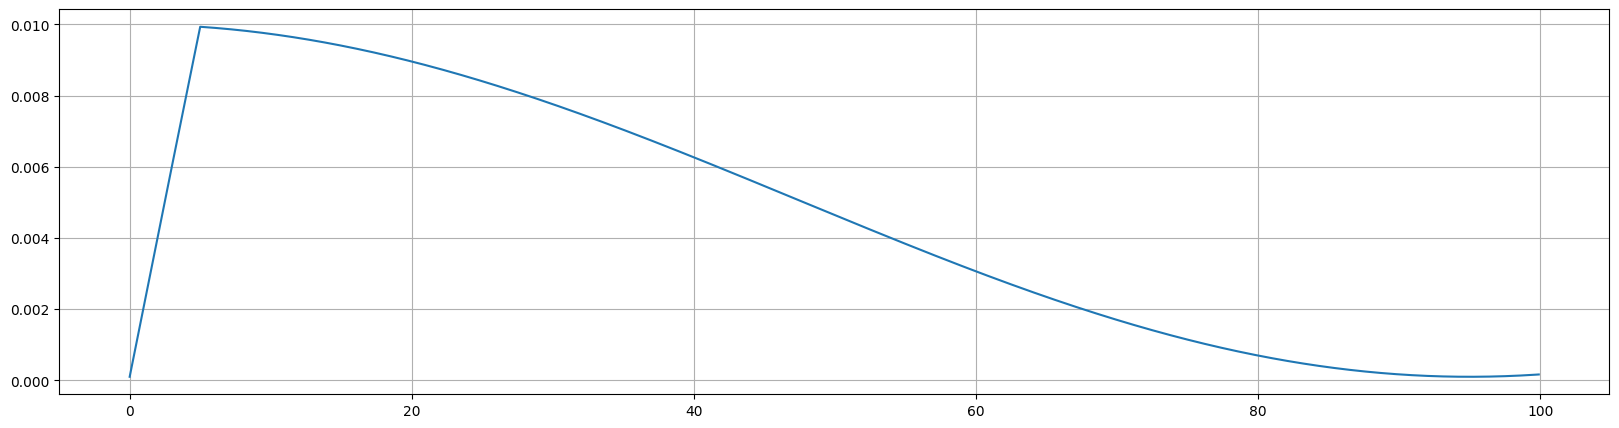

In [174]:
plt.figure(figsize=(20, 5))
plt.plot(x, lrs)
plt.grid()
plt.show()

In [175]:
px.line(x=x, y=lrs)